In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import seaborn as sns

In [2]:
df = pd.read_csv('./resources/fluorine_for_analysis.csv')
print(df)
df.loc[:, ['24h_RET', '1h_RET', '6h_RET']].mean().to_numpy()

     24h_RET    24h_EXT     24h_EM    24h_SRT     1h_RET     1h_EXT  \
0  35.550000  12.233333   9.166667   8.616667  66.116667  28.050000   
1  55.300000  10.283333   8.883333  43.900000  45.566667  19.166667   
2  37.783333  20.300000  38.050000  61.950000  62.216667  25.566667   
3  43.616667   0.000000   8.066667  14.983333  44.166667  16.666667   

       1h_EM     1h_SRT     6h_RET     6h_EXT      6h_EM     6h_SRT  
0  17.500000  36.391667  26.666667  12.516667  19.983333  52.783333  
1  39.733333  39.166667  33.900000  36.683333   7.483333  31.100000  
2  36.116667  43.466667  65.566667  46.100000  33.900000  51.950000  
3  22.216667  33.333333  39.150000  17.783333  33.883333  35.533333  


array([43.0625    , 54.51666667, 41.32083334])

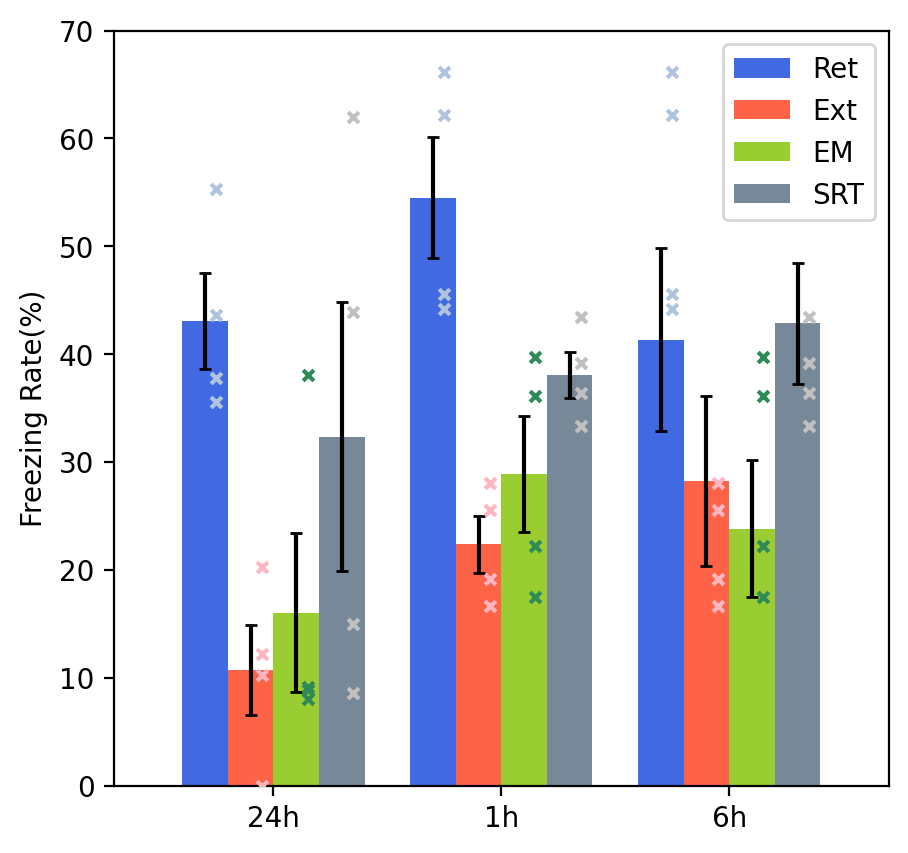

In [3]:
labels = np.array(['24h', '1h', '6h'])

ret = df.loc[:, ['24h_RET', '1h_RET', '6h_RET']]
ext = df.loc[:, ['24h_EXT', '1h_EXT', '6h_EXT']]
em  = df.loc[:, ['24h_EM', '1h_EM', '6h_EM']]
srt = df.loc[:, ['24h_SRT', '1h_SRT', '6h_SRT']]

ret_mean, ret_sem = ret.mean(), ret.sem()
ext_mean, ext_sem = ext.mean(), ext.sem()
em_mean, em_sem   = em.mean(), em.sem()
srt_mean, srt_sem = srt.mean(), srt.sem()

left = np.arange(-0.1, 2.1, 1.0)
width = 0.20

fig, ax = plt.subplots(figsize=(5, 5), dpi=200)

ax.bar(x=left - width, height=ret_mean, yerr=ret_sem, capsize=2, width=width, label='Ret', align='center', color='royalblue')
ax.bar(x=left, height=ext_mean, yerr=ext_sem, capsize=2, width=width, label='Ext', align='center', color='tomato')
ax.bar(x=left + width, height=em_mean, yerr=em_sem, capsize=2, width=width, label='EM', align='center', color='yellowgreen')
ax.bar(x=left + (width * 2), height=srt_mean, yerr=srt_sem, capsize=2, width=width, label='SRT', align='center', color='lightslategray')
ax.set_xticks([0.0, 1.0, 2.0])
ax.set_xticklabels(labels=labels)

plt.scatter([-0.25] * 4, ret.loc[:, '24h_RET'], c='lightsteelblue', zorder=12, s=15, marker='x')
plt.scatter([-0.05] * 4, ext.loc[:, '24h_EXT'], c='lightpink', zorder=12, s=15, marker='x')
plt.scatter([0.15] * 4, em.loc[:, '24h_EM'], c='seagreen', zorder=12, s=15, marker='x')
plt.scatter([0.35] * 4, srt.loc[:, '24h_SRT'], c='silver', zorder=12, s=15, marker='x')

plt.scatter([0.75] * 4, ret.loc[:, '1h_RET'], c='lightsteelblue', zorder=12, s=15, marker='x')
plt.scatter([0.95] * 4, ext.loc[:, '1h_EXT'], c='lightpink', zorder=12, s=15, marker='x')
plt.scatter([1.15] * 4, em.loc[:, '1h_EM'], c='seagreen', zorder=12, s=15, marker='x')
plt.scatter([1.35] * 4, srt.loc[:, '1h_SRT'], c='silver', zorder=12, s=15, marker='x')

plt.scatter([1.75] * 4, ret.loc[:, '1h_RET'], c='lightsteelblue', zorder=12, s=15, marker='x')
plt.scatter([1.95] * 4, ext.loc[:, '1h_EXT'], c='lightpink', zorder=12, s=15, marker='x')
plt.scatter([2.15] * 4, em.loc[:, '1h_EM'], c='seagreen', zorder=12, s=15, marker='x')
plt.scatter([2.35] * 4, srt.loc[:, '1h_SRT'], c='silver', zorder=12, s=15, marker='x')

ax.set_ylim(0, 70)
ax.set_xlim(-0.7, 2.7)
ax.set_ylabel('Freezing Rate(%)')
ax.legend()
fig.show()

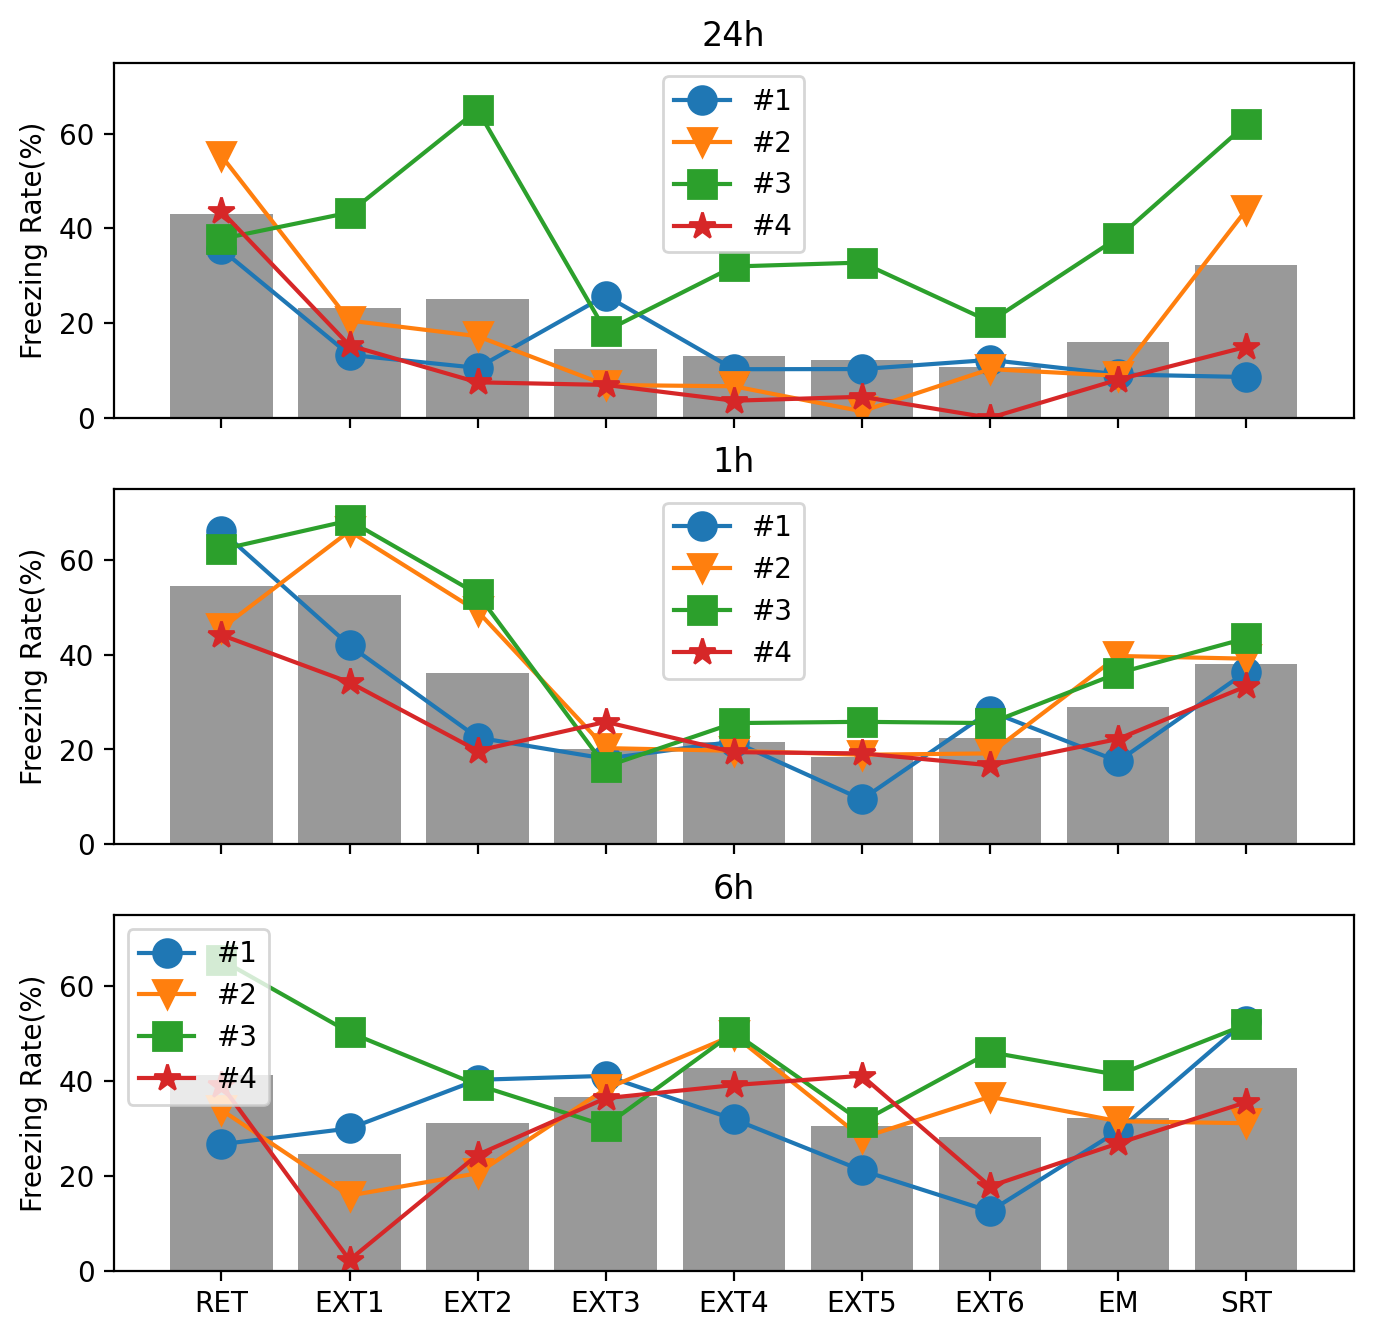

In [4]:
fig, axes = plt.subplots(3, figsize=(8, 8), dpi=200, sharex=True)
iteritems = ['24h', '1h', '6h']
for index, interval in enumerate(iteritems):
    ax = axes[index]
    file_path = './resources/%s_result.csv' % interval
    session_df = pd.read_csv(file_path)
    session_df.set_axis(['#1', '#2', '#3', '#4'], axis=0, inplace=True)
    x = session_df.columns
    makers = ['o', 'v', 's', '*']
    for index, animal_number in enumerate(session_df.index):
        y = session_df.loc[animal_number, :]
        ax.plot(x, y, label=animal_number, marker=makers[index], markersize=10.0)
    
    means = session_df.mean()
    bar_color = '0.6'
    ax.bar(x=0.0, height=means['RET'], color=bar_color)
    ax.bar(x=1.0, height=means['EXT1'], color=bar_color)
    ax.bar(x=2.0, height=means['EXT2'], color=bar_color)
    ax.bar(x=3.0, height=means['EXT3'], color=bar_color)
    ax.bar(x=4.0, height=means['EXT4'], color=bar_color)
    ax.bar(x=5.0, height=means['EXT5'], color=bar_color)
    ax.bar(x=6.0, height=means['EXT6'], color=bar_color)
    ax.bar(x=7.0, height=means['EM'], color=bar_color)
    ax.bar(x=8.0, height=means['SRT'], color=bar_color)
    
    ax.set_title(interval)
    ax.set_ylabel('Freezing Rate(%)')
    ax.set_ylim(0, 75)
    
    ax.legend()
plt.show()

In [5]:
df = pd.read_csv('./resources/re-replication_fluorine-1h-6h-RET-EXT-EM.csv')
df

,1h_RET,1h_EXT,1h_EM,6h_RET,6h_EXT,6h_EM
0,69.716667,35.833333,49.716667,51.650000,10.550000,5.000000
1,48.333333,28.350000,33.033333,51.683333,12.233333,18.900000
2,18.883333,27.783333,23.066667,47.500000,11.933333,7.516667
3,41.100000,34.433333,4.166667,43.600000,11.116667,12.500000


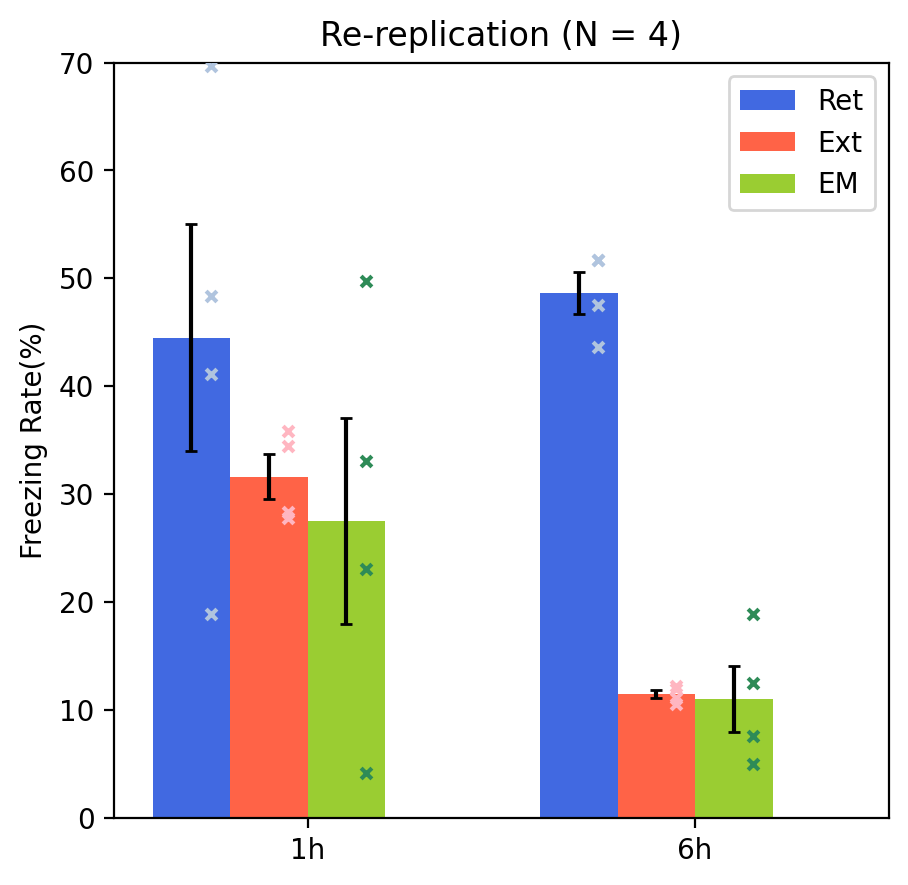

In [7]:
labels = np.array(['1h', '6h'])

ret = df.loc[:, ['1h_RET', '6h_RET']]
ext = df.loc[:, ['1h_EXT', '6h_EXT']]
em  = df.loc[:, ['1h_EM', '6h_EM']]

ret_mean, ret_sem = ret.mean(), ret.sem()
ext_mean, ext_sem = ext.mean(), ext.sem()
em_mean, em_sem   = em.mean(), em.sem()

left = np.arange(-0.1, 1.1, 1.0)
width = 0.20

fig, ax = plt.subplots(figsize=(5, 5), dpi=200)

ax.bar(x=left - width, height=ret_mean, yerr=ret_sem, capsize=2, width=width, label='Ret', align='center', color='royalblue')
ax.bar(x=left, height=ext_mean, yerr=ext_sem, capsize=2, width=width, label='Ext', align='center', color='tomato')
ax.bar(x=left + width, height=em_mean, yerr=em_sem, capsize=2, width=width, label='EM', align='center', color='yellowgreen')
ax.set_xticks([0.0, 1.0])
ax.set_xticklabels(labels=labels)

plt.scatter([-0.25] * 4, ret.loc[:, '1h_RET'], c='lightsteelblue', zorder=12, s=15, marker='x')
plt.scatter([-0.05] * 4, ext.loc[:, '1h_EXT'], c='lightpink', zorder=12, s=15, marker='x')
plt.scatter([0.15] * 4, em.loc[:, '1h_EM'], c='seagreen', zorder=12, s=15, marker='x')

plt.scatter([0.75] * 4, ret.loc[:, '6h_RET'], c='lightsteelblue', zorder=12, s=15, marker='x')
plt.scatter([0.95] * 4, ext.loc[:, '6h_EXT'], c='lightpink', zorder=12, s=15, marker='x')
plt.scatter([1.15] * 4, em.loc[:, '6h_EM'], c='seagreen', zorder=12, s=15, marker='x')

ax.set_ylim(0, 70)
ax.set_xlim(-0.5, 1.5)
ax.set_ylabel('Freezing Rate(%)')
ax.set_title('Re-replication (N = 4)')
ax.legend()
fig.show()

In [8]:
df = pd.read_csv('./resources/re-replication_fluorine-1h-6h-RET-EXT-EM-n8.csv')
df

,1h_RET,1h_EXT,1h_EM,6h_RET,6h_EXT,6h_EM
0,69.716667,35.833333,49.716667,51.650000,10.550000,5.000000
1,48.333333,28.350000,33.033333,51.683333,12.233333,18.900000
2,18.883333,27.783333,23.066667,47.500000,11.933333,7.516667
3,41.100000,34.433333,4.166667,43.600000,11.116667,12.500000
4,66.116667,28.050000,17.500000,26.666667,12.516667,19.983333
5,45.566667,19.166667,39.733333,33.900000,36.683333,7.483333
6,62.216667,25.566667,36.116667,65.566667,46.100000,33.900000
7,44.166667,16.666667,22.216667,39.150000,17.783333,33.883333


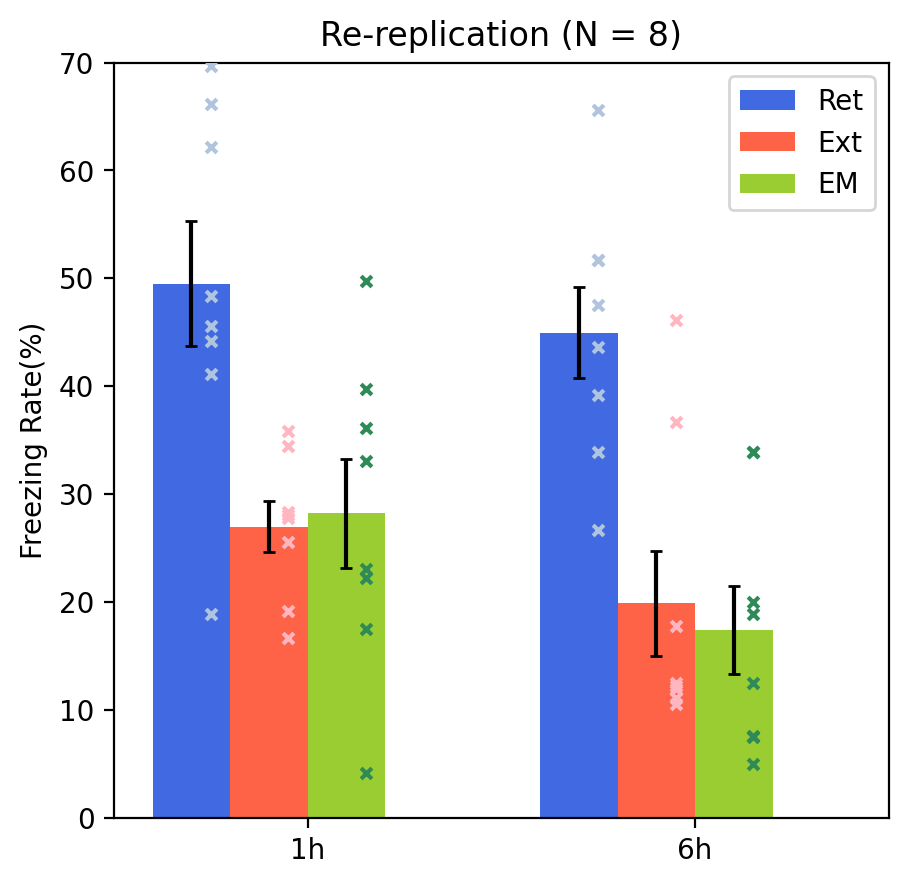

In [12]:
labels = np.array(['1h', '6h'])

ret = df.loc[:, ['1h_RET', '6h_RET']]
ext = df.loc[:, ['1h_EXT', '6h_EXT']]
em  = df.loc[:, ['1h_EM', '6h_EM']]

ret_mean, ret_sem = ret.mean(), ret.sem()
ext_mean, ext_sem = ext.mean(), ext.sem()
em_mean, em_sem   = em.mean(), em.sem()

left = np.arange(-0.1, 1.1, 1.0)
width = 0.20

fig, ax = plt.subplots(figsize=(5, 5), dpi=200)

ax.bar(x=left - width, height=ret_mean, yerr=ret_sem, capsize=2, width=width, label='Ret', align='center', color='royalblue')
ax.bar(x=left, height=ext_mean, yerr=ext_sem, capsize=2, width=width, label='Ext', align='center', color='tomato')
ax.bar(x=left + width, height=em_mean, yerr=em_sem, capsize=2, width=width, label='EM', align='center', color='yellowgreen')
ax.set_xticks([0.0, 1.0])
ax.set_xticklabels(labels=labels)

plt.scatter([-0.25] * len(ret), ret.loc[:, '1h_RET'], c='lightsteelblue', zorder=12, s=15, marker='x')
plt.scatter([-0.05] * len(ext), ext.loc[:, '1h_EXT'], c='lightpink', zorder=12, s=15, marker='x')
plt.scatter([0.15] * len(em), em.loc[:, '1h_EM'], c='seagreen', zorder=12, s=15, marker='x')

plt.scatter([0.75] * len(ret), ret.loc[:, '6h_RET'], c='lightsteelblue', zorder=12, s=15, marker='x')
plt.scatter([0.95] * len(ext), ext.loc[:, '6h_EXT'], c='lightpink', zorder=12, s=15, marker='x')
plt.scatter([1.15] * len(em), em.loc[:, '6h_EM'], c='seagreen', zorder=12, s=15, marker='x')

ax.set_ylim(0, 70)
ax.set_xlim(-0.5, 1.5)
ax.set_ylabel('Freezing Rate(%)')
ax.set_title('Re-replication (N = 8)')
ax.legend()
fig.show()

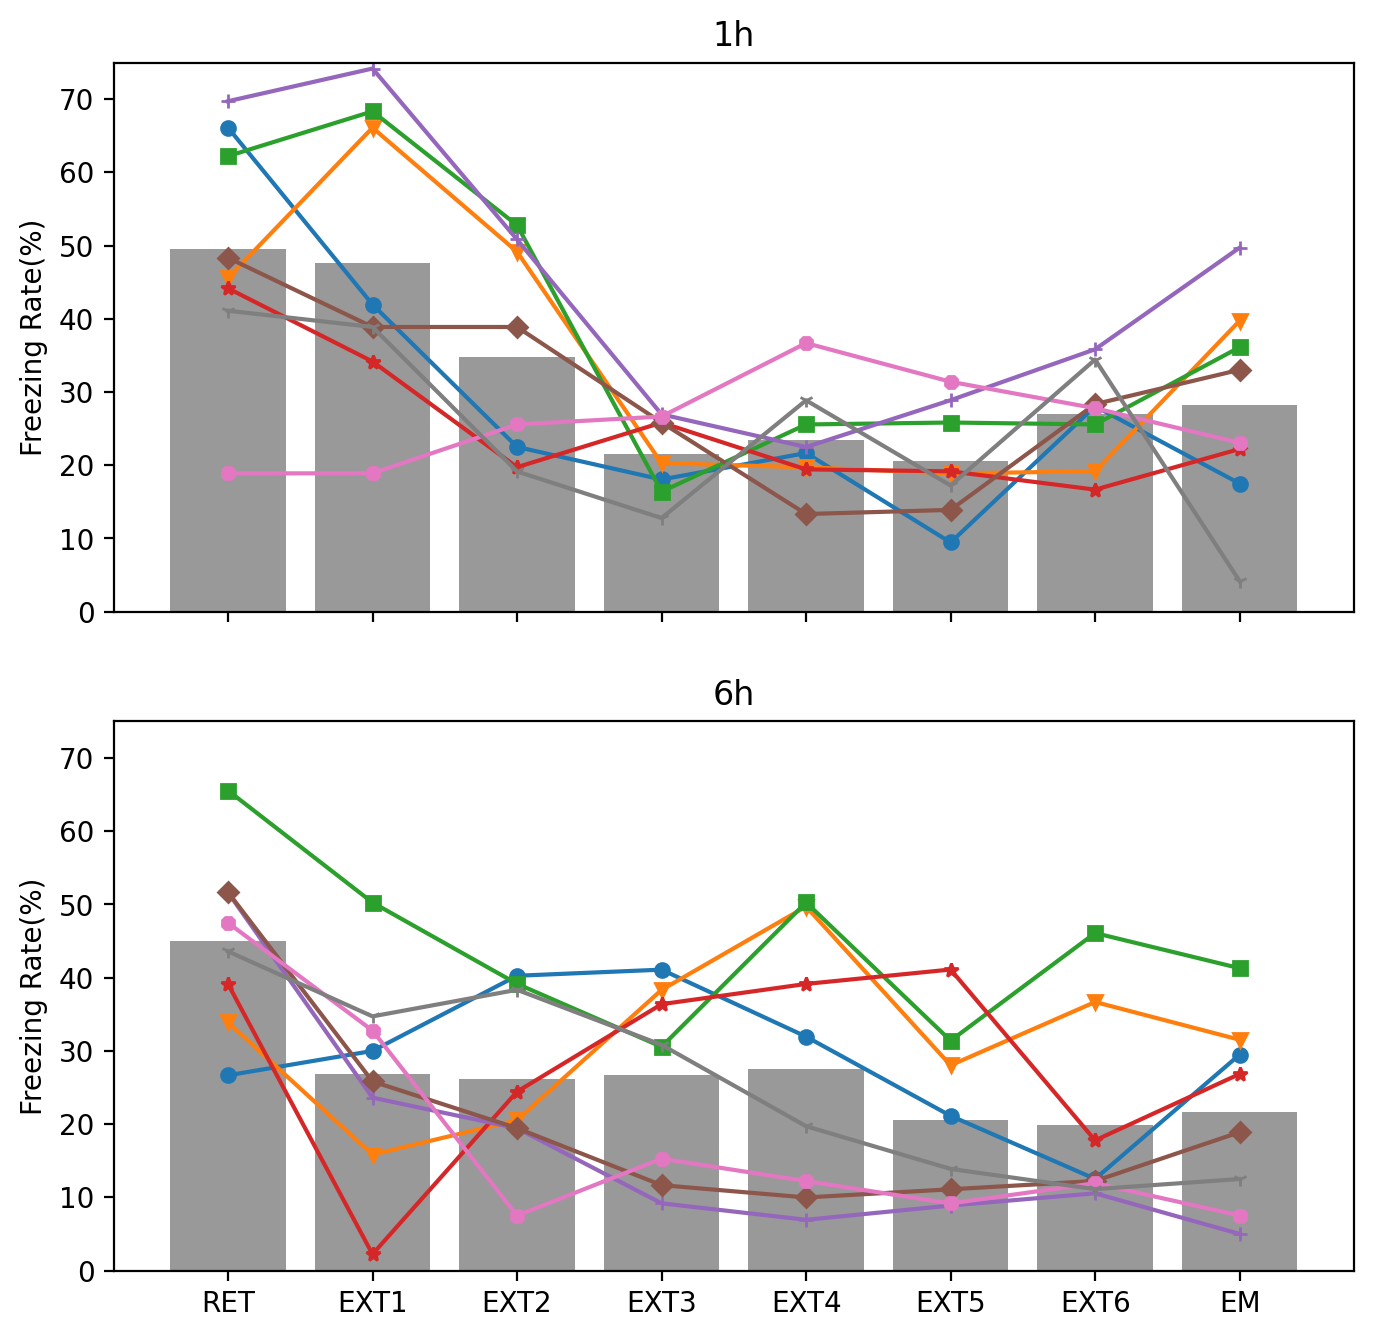

In [22]:
fig, axes = plt.subplots(2, figsize=(8, 8), dpi=200, sharex=True)
iteritems = ['1h', '6h']
labels = ['#%d' % i for i in range(8)]
for index, interval in enumerate(iteritems):
    ax = axes[index]
    file_path = './resources/%s_result_n8.csv' % interval
    session_df = pd.read_csv(file_path)
    session_df.set_axis(labels, axis=0, inplace=True)
    x = session_df.columns
    makers = ['o', 'v', 's', '*', '+', 'D', '8', '1']
    for index, animal_number in enumerate(session_df.index):
        y = session_df.loc[animal_number, :]
        ax.plot(x, y, label=animal_number, marker=makers[index], markersize=5.0)
    
    means = session_df.mean()
    bar_color = '0.6'
    ax.bar(x=0.0, height=means['RET'], color=bar_color)
    ax.bar(x=1.0, height=means['EXT1'], color=bar_color)
    ax.bar(x=2.0, height=means['EXT2'], color=bar_color)
    ax.bar(x=3.0, height=means['EXT3'], color=bar_color)
    ax.bar(x=4.0, height=means['EXT4'], color=bar_color)
    ax.bar(x=5.0, height=means['EXT5'], color=bar_color)
    ax.bar(x=6.0, height=means['EXT6'], color=bar_color)
    ax.bar(x=7.0, height=means['EM'], color=bar_color)
    
    ax.set_title(interval)
    ax.set_ylabel('Freezing Rate(%)')
    ax.set_ylim(0, 75)
    
    #ax.legend(loc='upper center')
plt.show()